# XGBoosting (Extreme Gradient Boosting)
1. XGBoost, short for eXtreme Gradient Boosting, is an advanced machine learning algorithm designed for efficiency, speed, and high performance.
2. XGBoost is an advanced implementation of Gradient Boosting that is:

       1. Fast

       2. Efficient

       3. Regularized

       4. Works well with missing values

       5. One of the most used algorithms in Kaggle competitions

## XGBoost Classification – Step-by-Step Math Intuition
1. Let’s suppose:

   1. Our target is binary: y ∈ {0, 1}

   2. We use log loss (logistic loss) as our objective function.



### Step 1: Initialize the Model
We start with:

     𝐹0(𝑥)=𝑙𝑜𝑔(𝑜𝑑𝑑𝑠)=𝑙𝑜𝑔(𝑝/(1−𝑝))=0
 which means:

    𝑝 = 0.5
So, the initial prediction is 50% probability for all samples.

### Step 2: Compute the Gradient and Hessian

To fit the next tree, we calculate the gradient (g) and hessian (h) for each data point:

Loss function: Binary log loss

     L = −[y∗log(p)+(1−y)∗log(1−p)]

We optimize using second-order Taylor expansion:

    1. Gradient (1st derivative):    
    
        g(i) = p(i) - y(i)
        
    2. Hessian (2nd derivative):

        ℎ(𝑖) = 𝑝𝑖∗(1−𝑝𝑖)
Where:

       𝑝𝑖 = 𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝐹(𝑥𝑖)) = 1/(1+𝑒𝑥𝑝(−𝐹(𝑥𝑖)))





### Step-3 : Fit a Tree on g and h
1. Each terminal leaf of the tree has a value w (leaf score) that minimizes the loss. For a leaf with examples i ∈ I:


   w = − Σgi / (Σhi + λ)

  λ = regularization parameter.   

### Step 4: Update the Model
Update the model:

     F1(x) = F0(x) + η∗w

η = learning rate (0 < η ≤ 1)

Repeat steps 2–4 for multiple rounds (trees).     

### Step 5: Final Prediction
After T trees:

        FT(x) = F0(x) + Σ(η ∗ wt(x))

 Convert score to probability:

        p = sigmoid(FT(x)) = 1 / (1+exp(−FT(x)))

#  XGBoost classification using the breast cancer dataset:

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
from sklearn.datasets import load_breast_cancer

In [55]:
# Load dataset
data = load_breast_cancer()
dir(data)


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [76]:
# Create DataFrame from data.data and add target
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add target column

In [78]:
# Split Independent Feature X and Dependent Feature y
x = df.drop('target', axis = 'columns')
y = df.target

In [80]:
 df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [84]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
len(X_train)

455

In [88]:
from xgboost import XGBClassifier

In [90]:
# Step 4: Initialize and Train the Model

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Important to avoid warnings
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [92]:
# Step 5: Predict and Evaluate
y_pred = model.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score, classification_report

In [98]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## hyperparameters tuning from GridSearchCV

In [101]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [103]:
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

In [105]:
grid = GridSearchCV(model, param_grid=params, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     m...step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [111]:
score = grid.best_params_
score

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}

In [115]:
# Step 4: Best estimator and prediction
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

In [117]:
# Step 5: Evaluation
print("Best Parameters:", grid.best_params_)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Accuracy Score: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [121]:
from xgboost import XGBClassifier, plot_importance

<Figure size 1200x600 with 0 Axes>

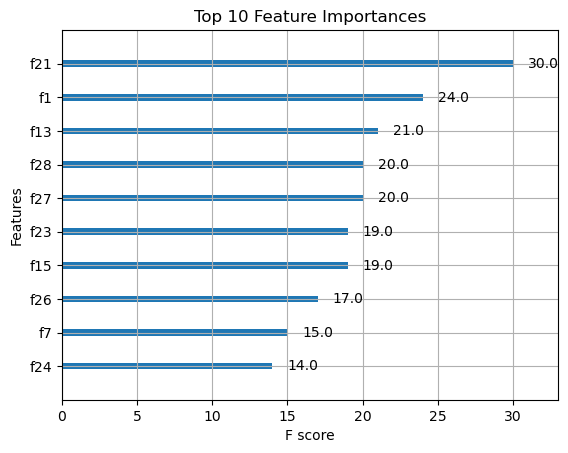

In [123]:
# Step 6: Plot Feature Importance
plt.figure(figsize=(12, 6))
plot_importance(best_model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()